## 3: WEDNESDAY - WHEN WILL THEY SHOP?


1. build grid: when do/dont they shop, how many times, on which day...
2. define priliminaries for algorithm
3. define filters for algorithm
4. RUN algorithm 


----


Outcome (example):
1. input: Wednesday
2. output: TRUE, 1x

Outcome pt. 2 (example):
1. input: 12:45 (time)
2. output: noon, TRUE

or

1. input: 19:34 (time)
2. output: evening, FALSE

### Import libraries 

In [2]:
# %matplotlib notebook
%matplotlib inline
#Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
import dataframe_image as dfi
from datetime import time
import matplotlib.dates as mdates
from matplotlib.ticker import StrMethodFormatter
from matplotlib.pyplot import figure



from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

In [3]:
# importing the required function
from scipy.stats import chi2_contingency

### Load and view data 

In [4]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")

# del df["HH"]
# df.describe(include='all')

In [13]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df_HH2.csv")

df_orders = df[['order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'times', 'dates', 'times_min', 'dates_days', 'order_amount', 'order_price']]
df_orders = df_orders.drop_duplicates()

-
# 1. Where? (store type/name)

In [17]:
# to select only one day
day = 'Wednesday'
df_day = df[df["day"] == day]

# check if you selected correctly
df_day.head()

# grouping the variables based of unique order id count
df_nunique = df_day.groupby(['store_name'])['order_ID'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()

,store_name,order_ID
0,Albert Heijn,4
1,Sys,1


<AxesSubplot:xlabel='store_name', ylabel='order_ID'>

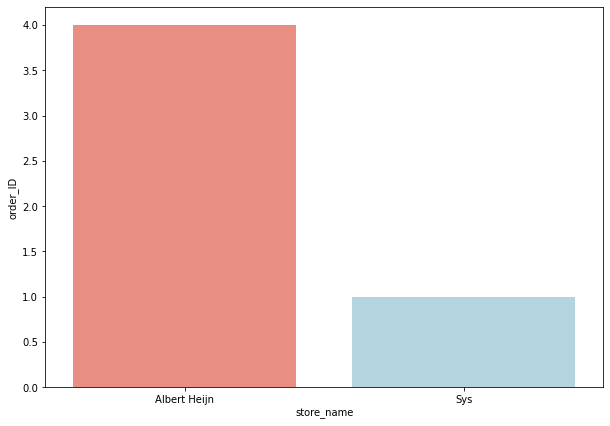

In [18]:
storename = df_nunique['store_name']
order_ID = df_nunique['order_ID']
cols = ['salmon', 'lightblue']
# barplot for store name on this day

# I want to count the unique order id's = the amount of times they went
plt.figure(figsize=(10,7))
sns.barplot(x=storename, y= order_ID, data=df_nunique, palette=cols)

-

# 2. At what time?

### 2.1  DAY VS TIME

In [19]:
#Let's try afternoon and evening as one group
df_orders['time'] = df_orders['time'].replace(['afternoon', 'evening'], 'afternoon')

In [31]:
# to select only one day & store
day = 'Wednesday'
df_day = df_orders[df_orders["day"] == day]

store = 'Albert Heijn'
df_day = df_day[df_day["store_name"] == store]

# check if you selected correctly
# df_day.head()

# grouping the variables based of unique order id count
df_nunique = df_day.groupby(['time'])['order_ID'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()

<AxesSubplot:xlabel='time', ylabel='order_ID'>

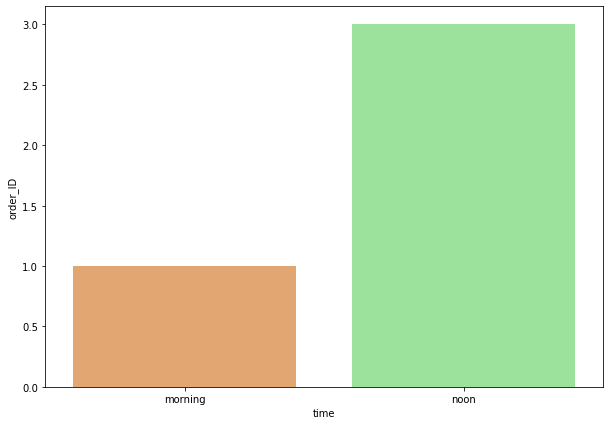

In [30]:
time = df_nunique['time']
order_ID = df_nunique['order_ID']
cols = ['sandybrown', 'lightgreen']

# barplot for store name on this day

# I want to count the unique order id's = the amount of times they went
plt.figure(figsize=(10,7))
sns.barplot(x=time, y= order_ID, data=df_nunique, palette=cols)